# Time Series Analysis - ARIMA Model #

## Example 1: USA Nominal GDP (Seasonal) ##

**In this example I would like to apply classic ARIMA model in USA Nominal GDP Time Series.**  
**The functions and methods can be apply to many other interesting cases in Economics and Business analysis**

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


**1. Raw data downloaded from Wind®  Financial Terminal provided by PHBS**

**Data:**  
Seasonal nominal GDP counted by purchasing power of USD that time, converted to year, in billion USD, from first season 1947 to second season 2020. 

**Finding:**  
By ploting the nomial GDP of USA, we can see there is a clear geometric growth trend. Obviously, it cannot be stationary, and we consider to build an ARIMA model on the the log differential GDP.

            USA_GDP
date               
1947-03-31    243.2
1947-06-30    246.0
1947-09-30    249.6
1947-12-31    259.7
1948-03-31    265.7
1948-06-30    272.6
1948-09-30    279.2
1948-12-31    280.4
1949-03-31    275.0
1949-06-30    271.4
1949-09-30    272.9
1949-12-31    270.6
1950-03-31    280.8
1950-06-30    290.4
1950-09-30    308.2
1950-12-31    319.9
1951-03-31    336.0
1951-06-30    344.1
1951-09-30    351.4
1951-12-31    356.2
1952-03-31    359.8
1952-06-30    361.0
1952-09-30    367.7
1952-12-31    380.8
1953-03-31    388.0
1953-06-30    391.7
1953-09-30    391.2
1953-12-31    386.0
1954-03-31    385.3
1954-06-30    386.1
...             ...
2013-03-31  16569.6
2013-06-30  16637.9
2013-09-30  16848.7
2013-12-31  17083.1
2014-03-31  17104.6
2014-06-30  17432.9
2014-09-30  17721.7
2014-12-31  17849.9
2015-03-31  18003.4
2015-06-30  18223.6
2015-09-30  18347.4
2015-12-31  18378.8
2016-03-31  18470.2
2016-06-30  18656.2
2016-09-30  18821.4
2016-12-31  19032.6
2017-03-31  19237.4


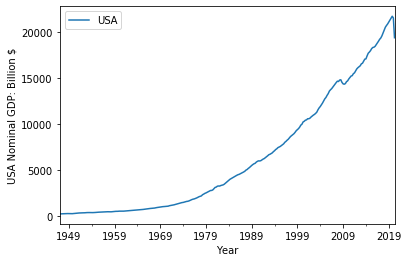

In [46]:
# Read data 
dataFile = 'data/USA_nominal_GDP_seasonal.xls'
data = pd.read_excel(dataFile, index_col = 'date')
print(data)

# Plot the row data
data.plot()
plt.xlabel('Year')
plt.ylabel('USA Nominal GDP: Billion $')
plt.legend(['USA'])
plt.show()

In [47]:
# Generate log differential GDP and add it into our data frame
data['log_GDP'] = data.USA_GDP.apply(lambda x: np.log(x))
data['log_GDP_diff'] = data.log_GDP.diff()
data

,USA_GDP,log_GDP,log_GDP_diff
date,,,
1947-03-31,243.2,5.493884,NaN
1947-06-30,246.0,5.505332,0.011447
1947-09-30,249.6,5.519860,0.014528
1947-12-31,259.7,5.559527,0.039667
1948-03-31,265.7,5.582368,0.022841
1948-06-30,272.6,5.608006,0.025638
1948-09-30,279.2,5.631928,0.023923
1948-12-31,280.4,5.636217,0.004289
1949-03-31,275.0,5.616771,-0.019446


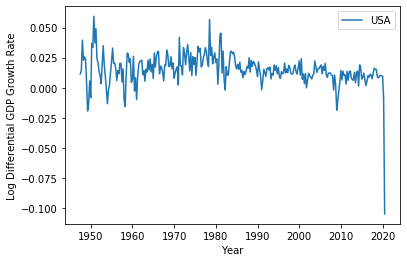

In [48]:
# Plot the log differential GDP series
plt.plot(data['log_GDP_diff'])
plt.xlabel('Year')
plt.ylabel('Log Differential GDP Growth Rate')
plt.legend(['USA'])
plt.show()

**2. Data Preprocessing: Abnormal Observation**

**Finding:**  
As we can see from the plot, there is a 10% drop in log differential GDP growth rate in the second season of 2020.  
The huge drop mainly came from the unexpected exogenous shock of Cov-2019 Pandemic. Since abnormal observation have considerable impact on the ARIMA model fitting, I decided to drop the abnormal observation of 2020 S1.


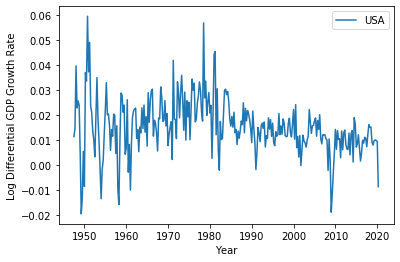

In [49]:
# Drop the abnormal data of 2020 S1
data.log_GDP_diff['2020-06-30'] = np.nan

GDP_growth = data.log_GDP_diff.dropna() # drop all the data point without observation
GDP_growth.columns = ['GDP_growth']

plt.plot(GDP_growth)
plt.xlabel('Year')
plt.ylabel('Log Differential GDP Growth Rate')
plt.legend(['USA'])
plt.show()

**3. Autocorrelation and Partial Autocorrelation**

**Findings:**  
  
For autocorrelation, the autocorrelation function with lags = 1, 2, 9, 10, 11; 16, 17, and 18 lay beyond the threshold  
For partial autocorrelation, the partial autocorrelation function with lags =1, 2, 3, 6, 9, 14, 16 lay beyond the threshold  

[ 1.          0.4934337   0.37563305  0.1494614   0.07414426 -0.04283935
  0.04880059  0.08753443  0.10927799  0.22827019  0.25874203  0.21244106
  0.09806951  0.0839132   0.1228089   0.11096992  0.23816372  0.22391438
  0.27037915  0.20407778  0.20643139  0.09064066  0.07703097  0.04346312
  0.11919711  0.1528259 ]
[ 1.          0.49512935  0.17628814 -0.12377658 -0.01971032 -0.07952561
  0.1402098   0.09918043 -0.0022612   0.18917265  0.09781147 -0.01665105
 -0.09051615  0.03690399  0.19301093  0.02320227  0.16771244  0.02461072
  0.08855826  0.00797235  0.00601335 -0.01449359  0.04331755  0.0073623
  0.09605619  0.03573739]


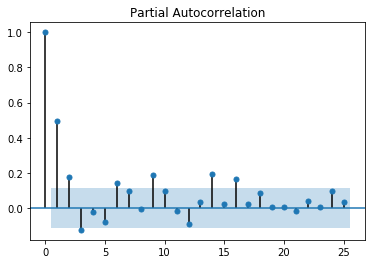

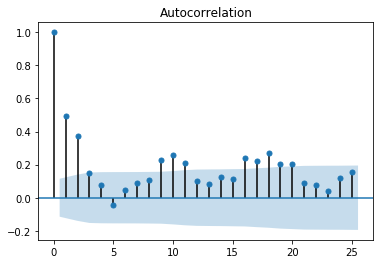

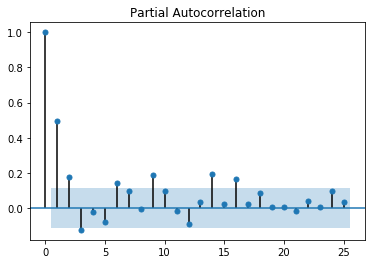

In [50]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import pacf

print(acf(GDP_growth, nlags = 25))
print(pacf(GDP_growth, nlags = 25))

plot_acf(GDP_growth)
plot_pacf(GDP_growth)

**4. Stationarity Test: ADF test**

**Finding:**  
Since the p-value of the adf test for stationarity is 29%, it fail to reject the null hypothesis, and we can consider the log return of GDP is a stationary time series. Thus, no further differential is needed.

In [51]:
from statsmodels.tsa.stattools import adfuller
adfuller?
adfuller(GDP_growth)


# results are: (adf, pvalue, usedlag, nobs, critical values, icbest)
# see 'adfuller?' for reference

(-1.9824467291608414,
 0.29432223226180426,
 15,
 276,
 {'1%': -3.4542672521624214,
  '5%': -2.87206958769775,
  '10%': -2.5723807881747534},
 -1844.0903208436298)

**5. White Noise Test: Ljungbox Test**

**Finding:**  
Since the p_value of the Ljungbox test with lags = 1, 2, ..., 25 are far smaller than 1%, we are confident to reject the null hypothesis that the GDP growth rate time series is white noise.

In [52]:
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox?
acorr_ljungbox(GDP_growth, lags = 25)

# results are: array of test_statistics, and array of p_value with lags = 1, 2, ..., 25

(array([ 71.82816993, 113.59771909, 120.23347567, 121.87215041,
        122.42110198, 123.13595097, 125.44399012, 129.05374114,
        144.86047518, 165.2409842 , 179.02896884, 181.97773383,
        184.14437282, 188.80178955, 192.61825139, 210.26124617,
        225.91294448, 248.81771958, 261.91433181, 275.36403645,
        277.96663411, 279.85330915, 280.45617373, 285.00738333,
        292.51691489]),
 array([2.34776545e-17, 2.15064496e-25, 6.87311046e-26, 2.12687747e-25,
        9.63379060e-25, 3.57398823e-24, 5.61736172e-24, 4.44375006e-24,
        1.02146285e-26, 2.67789990e-30, 1.62612166e-32, 1.67516132e-32,
        2.41815191e-32, 1.05421787e-32, 6.68634651e-33, 6.63193725e-36,
        1.67038890e-38, 1.41847662e-42, 1.18553507e-44, 8.40849772e-47,
        9.43252420e-47, 1.45149880e-46, 3.97641656e-46, 1.72576260e-46,
        1.89985721e-47]))

**6. Order Determination**

**Finding:**  
According to the Bayesian Information Criterion（BIC）rule, the ARIMA(2,0,0) or AR(2) model minimize the BIC.


In [53]:
from statsmodels.tsa.arima_model import ARIMA

In [54]:
# Compute the bic matrix for order determination
pmax = int(np.log(len(GDP_growth)))
qmax = int(np.log(len(GDP_growth)))

bic_matrix = np.zeros((pmax,qmax))

for pp in range(pmax):
    for qq in range(qmax):
        
        # There are errors, so that we use a try-except control here
        try:
            bic_matrix[pp,qq] = ARIMA(GDP_growth,(pp,0,qq),freq = 'q').fit().bic
            
        except:
            bic_matrix[pp,qq] = 0
            
# Convert the bic matrix into data frame
bic_matrix_frame = pd.DataFrame(bic_matrix)


In [55]:
bic_matrix_frame

,0,1,2,3,4
0,-1798.858122,-1844.993574,-1873.613099,-1875.637620,-1876.949848
1,-1876.001795,-1875.990394,-1877.771042,-1872.478532,-1874.607901
2,-1879.287723,-1878.302244,-1872.714845,0.000000,0.000000
3,-1878.438502,-1872.957882,-1867.516627,0.000000,0.000000
4,-1872.852648,-1867.281154,-1862.372278,-1872.606714,0.000000


In [56]:
# The optimal ARIMA model is ARIMA(2,0,0) or AR(2)
p_star,q_star = bic_matrix_frame.stack().idxmin()
print(f'The ARIMA({p_star},0,{q_star}) minimize the Bayesian Information Criterion（BIC）')

The ARIMA(2,0,0) minimize the Bayesian Information Criterion（BIC）


**7. Model Fitting and Forecast**

In [57]:
# Use the model.summary method to summarize the model
model = ARIMA(GDP_growth, (2,0,0),freq = 'q').fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           log_GDP_diff   No. Observations:                  292
Model:                     ARMA(2, 0)   Log Likelihood                 950.997
Method:                       css-mle   S.D. of innovations              0.009
Date:                Fri, 14 Aug 2020   AIC                          -1893.995
Time:                        11:13:12   BIC                          -1879.288
Sample:                    06-30-1947   HQIC                         -1888.104
                         - 03-31-2020                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0152      0.001     11.577      0.000       0.013       0.018
ar.L1.log_GDP_diff     0.4129      0.058      7.122      0.000       0.299       0.527
ar.L2.log_GDP_diff     0.1749      0.058      3.018      0.003       0.061       0.288
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4863           +0.0000j            1.4863            0.0000
AR.2           -3.8475           +0.0000j            3.8475            0.5000
-----------------------------------------------------------------------------
"""

In [58]:
# model.summary2 method  can also be used
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARMA
====================================================================
Model:              ARMA             BIC:                 -1879.2877
Dependent Variable: log_GDP_diff     Log-Likelihood:      951.00    
Date:               2020-08-14 11:13 Scale:               1.0000    
No. Observations:   292              Method:              css-mle   
Df Model:           3                Sample:              06-30-1947
Df Residuals:       289                                   03-31-2020
Converged:          1.0000           S.D. of innovations: 0.009     
No. Iterations:     22.0000          HQIC:                -1888.104 
AIC:                -1893.9947                                      
---------------------------------------------------------------------
                    Coef.   Std.Err.     t     P>|t|   [0.025  0.975]
---------------------------------------------------------------------
const               0.0152    0.0013  11.5773  0.0000  0.0126  0.0178
ar.L1.log_GDP_diff  0.4129    0.0580   7.1225  0.0000  0.2993  0.5265
ar.L2.log_GDP_diff  0.1749    0.0579   3.0177  0.0028  0.0613  0.2884
-----------------------------------------------------------------------------
                 Real           Imaginary          Modulus          Frequency
-----------------------------------------------------------------------------
AR.1            1.4863             0.0000           1.4863             0.0000
AR.2           -3.8475             0.0000           3.8475             0.5000
====================================================================

"""

In [59]:
# forecast the next 8 seasons (2 years) log GDP growth rate of the USA (if without the shock of cov-2019) 
model.forecast(8)
model.forecast?
# Results are forecast,standard error of forecast,and confidence interval
# See model.forecast? for reference

## More Examples to be found ##